In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.smear import *
from iminuit import Minuit
import statistics 
import scipy.special as sc
from scipy.integrate import quad
from math import factorial


In [73]:
N=10
T_true = 0.95

In [3]:
tof_bin = np.linspace(150000.0, 400000.0, num=50)

In [13]:
##Gaussian
T_fit_g = []
T_fit_err_g = []
mean_fit_g=[]
mean_fit_err_g = []
for i in range(5000):
    Target_out_g = np.random.normal(N, np.sqrt(N), size = 50)
    Target_in_g = np.random.normal(N*T_true, np.sqrt(N*T_true), size = 50)
    Target_out_err_g = np.sqrt(N)
    Target_in_err_g = np.sqrt(N*T_true)
    def chi_sq(mean,T):
        T_f = np.array([T for i in range(50)]) 
        mean_f = np.array([mean for i in range(50)]) 
        return np.sum(((mean_f - Target_out_g)/Target_out_err_g)**2) + np.sum(((mean_f * T_f - Target_in_g)/Target_in_err_g)**2)
    m_g= Minuit(chi_sq,100,0.95)
    m_g.migrad()  
    T_fit_g.append(m_g.values["T"])
    T_fit_err_g.append(m_g.errors["T"])
    mean_fit_g.append(m_g.values["mean"])
    mean_fit_err_g.append(m_g.errors["mean"])
T_fit_g = np.array(T_fit_g)
T_fit_err_g = np.array(T_fit_err_g)
mean_fit_g = np.array(mean_fit_g)
mean_fit_err_g = np.array(mean_fit_err_g)



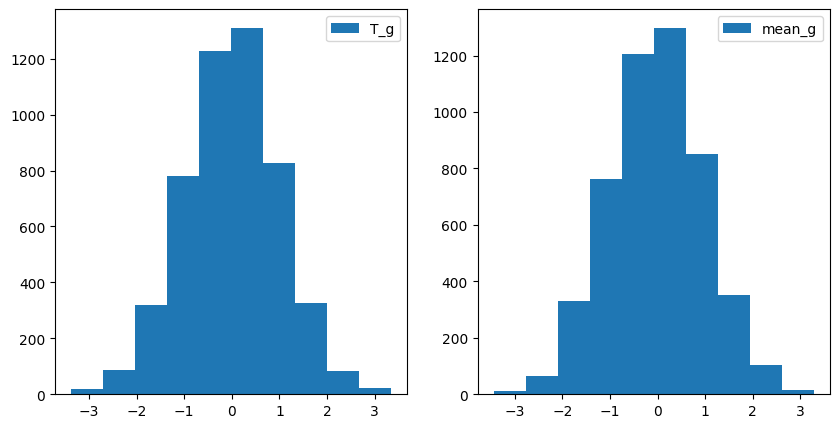

In [43]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist((T_fit_g - T_true)/T_fit_err_g,bins=10,label= 'T_g')
plt.legend(loc='upper right')
plt.subplot(1,2,2)

plt.hist((mean_fit_g - N)/mean_fit_err_g,bins=10,label= 'mean_g')                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
plt.legend(loc='upper right')


In [74]:
##Possion
T_fit_p = []
T_fit_err_p = []
mean_fit_p=[]
mean_fit_err_p = []
for i in range(5000):
    Target_out_p = np.random.poisson(N, size = 50)
    Target_in_p = np.random.poisson(N*T_true,size = 50)
    Target_out_err_p = np.sqrt(Target_out_p)
    Target_in_err_p = np.sqrt(Target_in_p)
    def chi_sq(mean,T):
        T_f = np.array([T for i in range(50)]) 
        mean_f = np.array([mean for i in range(50)]) 
        return np.sum(((mean_f - Target_out_p)/Target_out_err_p)**2) + np.sum(((mean_f * T_f - Target_in_p)/Target_in_err_p)**2)
    m_p= Minuit(chi_sq,10,0.95)
    m_p.migrad()  
    T_fit_p.append(m_p.values["T"])
    T_fit_err_p.append(m_p.errors["T"])
    mean_fit_p.append(m_p.values["mean"])
    mean_fit_err_p.append(m_p.errors["mean"])
T_fit_p = np.array(T_fit_p)
T_fit_err_p = np.array(T_fit_err_p)
mean_fit_p = np.array(mean_fit_p)
mean_fit_err_p = np.array(mean_fit_err_p)



/var/folders/jq/rwhrsr9j0kv4_6rw6htyzjk40000gn/T/ipykernel_70708/2793818441.py:14: RuntimeWarning: divide by zero encountered in divide
  return np.sum(((mean_f - Target_out_p)/Target_out_err_p)**2) + np.sum(((mean_f * T_f - Target_in_p)/Target_in_err_p)**2)


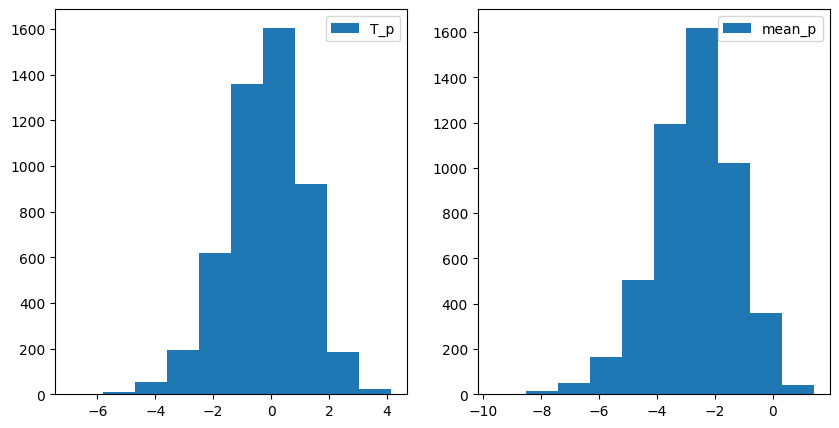

In [75]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist((T_fit_p - T_true)/T_fit_err_p,bins=10,label= 'T_p')
plt.legend(loc='upper right')
plt.subplot(1,2,2)

plt.hist((mean_fit_p - N)/mean_fit_err_p,bins=10,label= 'mean_p')
plt.legend(loc='upper right')

In [7]:
def transmission(target_in, target_out,N,T_true):
    transmission = target_in / target_out
#    transmission_error = transmission*np.sqrt(1.0/target_in + 1.0/target_out)
    transmission_error = transmission*np.sqrt(N/(target_in**2) + N*T_true/target_out)
    return transmission, transmission_error

In [11]:
 m= Minuit(chi_sq,100,0.95)
m.migrad()
#T_fit.append(m.values["T"])
#T_fit_err.append(m.errors["T"])

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 66.47                      │              Nfcn = 31               │
│ EDM = 2.84e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mean │   101.2   │    1.4    │            │            │         │         │       │
│ 1 │ T    │   0.958   │   0.019   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────┬───────────────────┐
│      │     mean        T │
├──────┼───────────────────┤
│ mean │        2 -18.9e-3 │
│    T │ -18.9e-3 0.000365 │
└──────┴───────────────────┘

In [148]:
def chi_sq(T):
#    ts,ts_err = transmission(target_in,target_out)
    T_f = np.array([T for i in range(50)]) 
    return  np.sum(((T_f - ts) / ts_err) ** 2)

In [303]:
T_fit = []
T_fit_err = []
for i in range(5000):
#    Target_out = np.random.poisson(N, size = 50)
    Target_out = np.random.normal(N, np.sqrt(N), size = 50)
    Target_out_err = np.sqrt(N)
#    Target_out_err = np.sqrt(Target_out)
#    Target_in = np.random.poisson(N*T_true, size = 50)
    Target_in = np.random.normal(N*T_true, np.sqrt(N*T_true), size = 50)
    Target_in_err = np.sqrt(N*T_true)
#    Target_in_err = np.sqrt(Target_in)
    ts,ts_err = transmission(Target_in,Target_out)
    def chi_sq(T):
        T_f = np.array([T for i in range(50)]) 
#        print(T_f)
        return  np.sum(((T_f - ts) / ts_err) ** 2)
    m= Minuit(chi_sq,0.5)
#    m.fixed["target_in"] = True
#    m.fixed["target_out"] = True
    m.migrad()
    T_fit.append(m.values["T"])
    T_fit_err.append(m.errors["T"])
    

In [304]:
T_fit = np.array(T_fit)
T_fit_err = np.array(T_fit_err)
sigma = statistics.stdev(T_fit)

(array([  6.,   8.,  34., 124., 255., 476., 752., 938., 873., 767., 455.,
        215.,  72.,  18.,   7.]),
 array([-5.86173782, -5.3307031 , -4.79966838, -4.26863367, -3.73759895,
        -3.20656423, -2.67552952, -2.1444948 , -1.61346008, -1.08242537,
        -0.55139065, -0.02035593,  0.51067878,  1.0417135 ,  1.57274822,
         2.10378294]),
 <BarContainer object of 15 artists>)

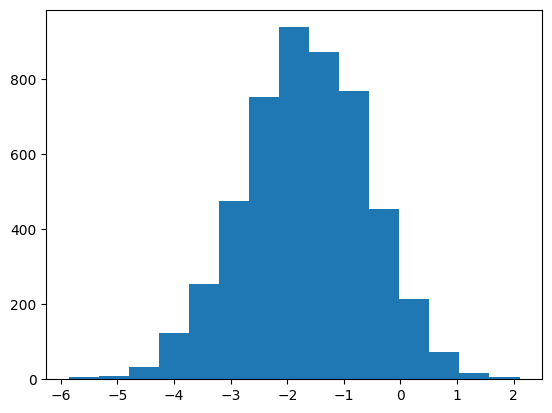

In [305]:
plt.hist((T_fit - T_true)/T_fit_err,bins=15)

In [97]:
m.values["T"]

0.9115668370851737

In [106]:
m.errors["T"]


0.018657532928868147

<ErrorbarContainer object of 3 artists>

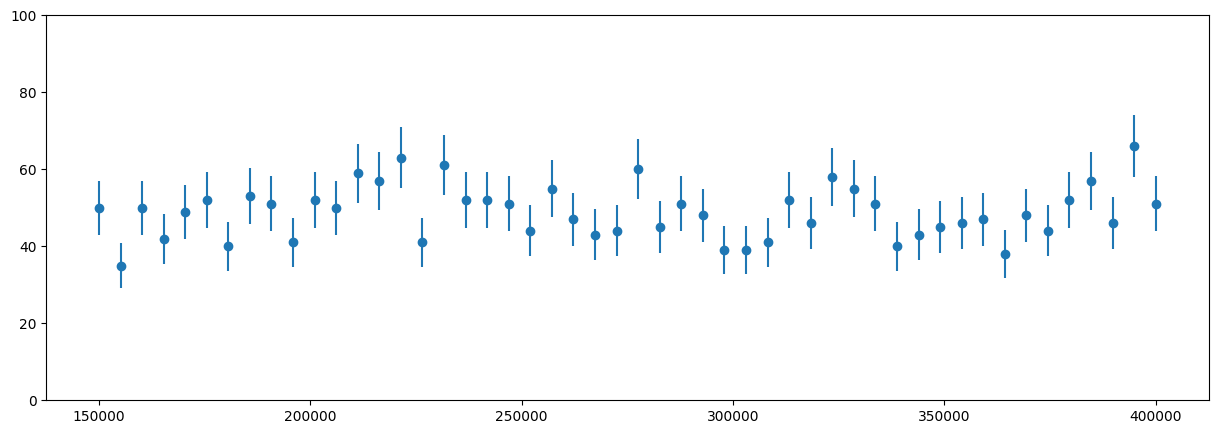

In [221]:
Target_in = np.random.poisson(N*T_true, size = 50)
Target_in_err = np.sqrt(Target_in)
plt.figure(figsize=(15,5))

plt.ylim(0,100)
plt.errorbar(tof_bin,Target_in,Target_in_err,fmt ='o',label= 'PTBC')


[ 87.04467135 117.00250297  97.47613965 101.88145658 107.41509553
  85.66298877  99.42167584  90.93751257  91.74033624 102.39883432
 103.09379315 103.71027485 115.20704847  92.98476181  87.48585676
 102.73350037 109.67191023 101.81202515  84.23751186 102.49997089
 109.88053435  91.88420874 103.82789221 100.70248625  78.37776962
 112.44575652 102.04916271 108.01249817  99.74692042  90.12756627
 100.98567651  94.52038372  85.44915132 114.40226651  95.11750945
  98.72152046 107.43196174  80.28202938  96.03728076 106.98638724
 108.67590506 114.08053108 109.01542298  98.98988745  84.24766802
  91.45160575  94.03543502 102.53358316  92.70905994 103.74180299]


<ErrorbarContainer object of 3 artists>

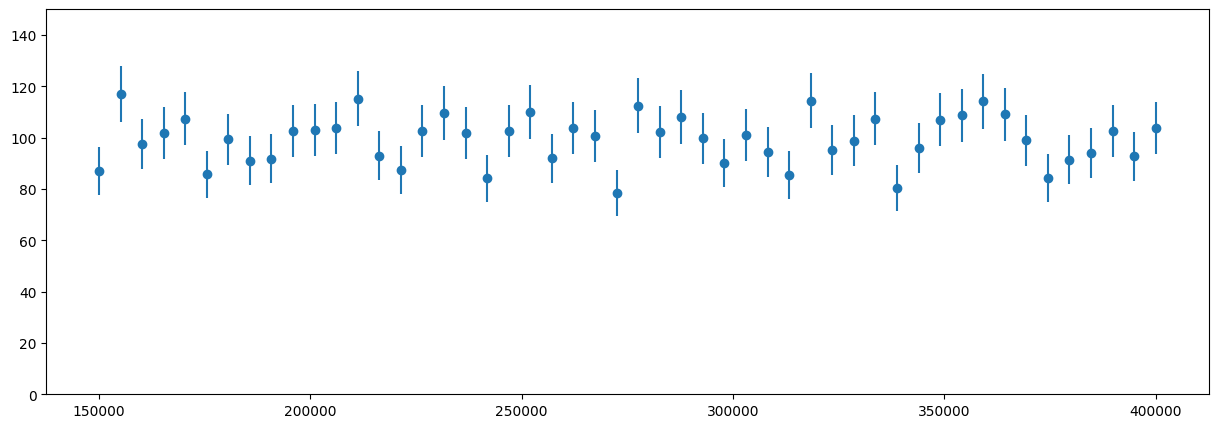

In [301]:
N=100
Target_out = np.random.normal(N, np.sqrt(N), size = 50)
print(Target_out)
Target_out_err = np.sqrt(Target_out)
plt.figure(figsize=(15,5))

plt.ylim(0,150)
plt.errorbar(tof_bin,Target_out,Target_out_err,fmt ='o',label= 'PTBC')

In [8]:
def gaussian(x,mu,sig):
    return np.exp(-((x - mu) ** 2) / 2 / sig ** 2) / np.sqrt(2 * np.pi * sig ** 2)

In [54]:
x_bin = np.linspace(0, 200.0, num=201)

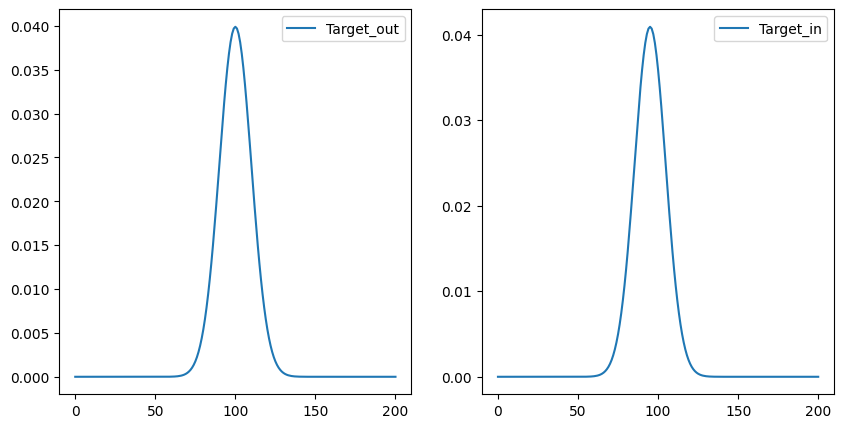

In [60]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(x_bin,gaussian(x_bin,100,10),label='Target_out')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(x_bin,gaussian(x_bin,100*0.95,np.sqrt(100*0.95)),label='Target_in')
plt.legend(loc='upper right')


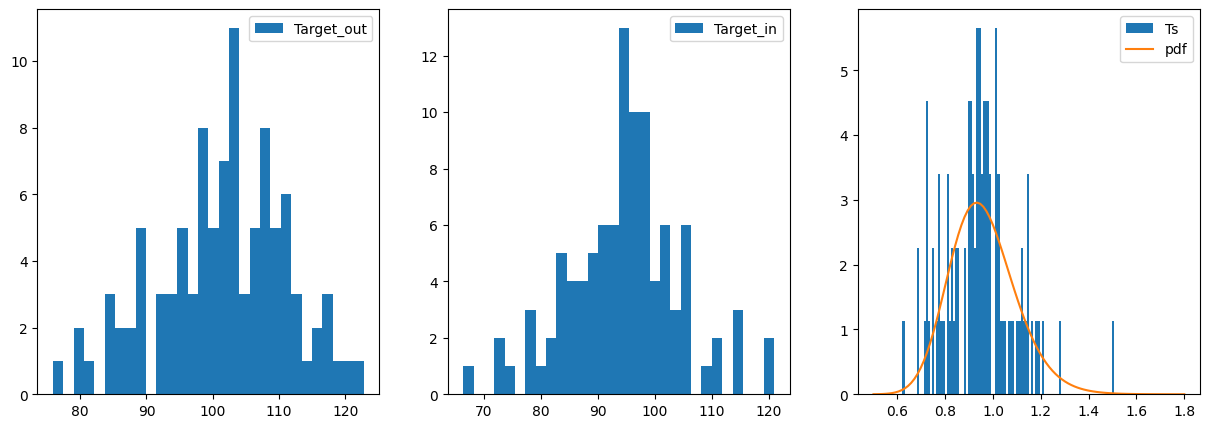

In [17]:
Target_out = np.random.normal(100, np.sqrt(100), size = 100)
Target_in = np.random.normal(95, np.sqrt(95), size = 100)
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(Target_out,label='Target_out',bins=30)
plt.legend(loc='upper right')

plt.subplot(1,3,2)
plt.hist(Target_in,label='Target_in',bins=30)
plt.legend(loc='upper right')

plt.subplot(1,3,3)
plt.hist(Target_in/Target_out,label='Ts',bins=100,density=True)
plt.plot(T_bin,P(T_bin),label = 'pdf')
plt.legend(loc='upper right')

In [3]:
def Integrand(x,Ts,T_true):
    N=100
#    T_true = 0.95
    return gaussian(x,N,np.sqrt(N))*gaussian(x*Ts,N*T_true,np.sqrt(N*T_true))*np.abs(x)

In [4]:
def P(T):
    I=np.array([])
    for i in T:
        Ts = i
        T_true = 0.95
        result = quad(Integrand, -np.inf, np.inf, args=(Ts,T_true))[0]
        I=np.append(I,result)
    return I

In [5]:
def p(T,T_true):
    Ts = T
    result = quad(Integrand, -np.inf, np.inf, args=(Ts,T_true))[0]
    #I=np.append(I,result)
    return result

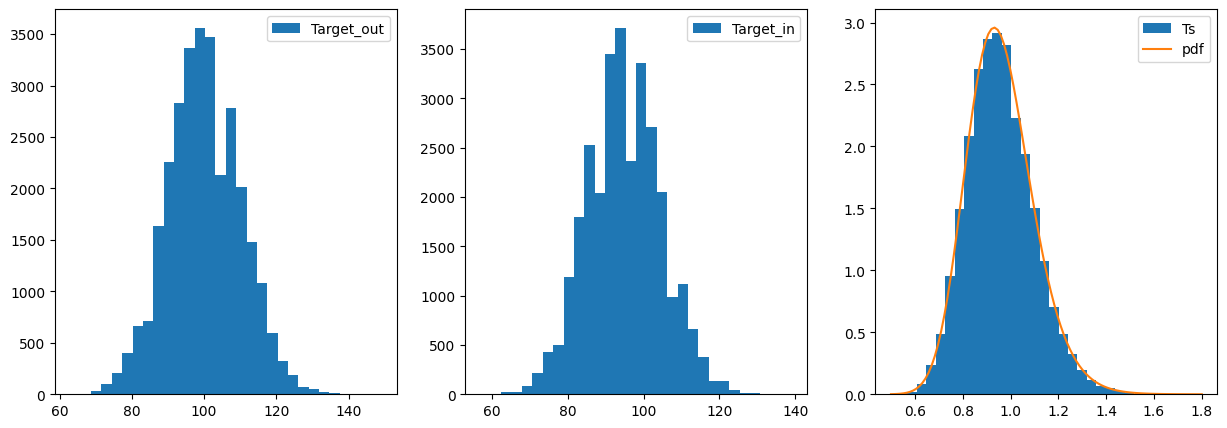

In [287]:
Target_out = np.random.poisson(100, size = 30000)
Target_in = np.random.poisson(95, size = 30000)
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(Target_out,label='Target_out',bins=30)
plt.legend(loc='upper right')

plt.subplot(1,3,2)
plt.hist(Target_in,label='Target_in',bins=30)
plt.legend(loc='upper right')

plt.subplot(1,3,3)
plt.hist(Target_in/Target_out,label='Ts',bins=30,density=True)
plt.plot(T_bin,P(T_bin),label = 'pdf')
plt.legend(loc='upper right')

In [257]:
def possion(k,lam):
    return np.exp(-lam) * lam**k/factorial(k)

In [2]:
T_bin = np.linspace(0.5, 1.8, num=100)

In [10]:
T_list = Target_in/Target_out

In [15]:
def logli(T_true):
    L=0
#    N_bins = 200
#    T_bin = np.linspace(0.5, 1.8, num=N_bins)
    for i in T_list:
        L=L + np.log(p(i,T_true))
    return L

In [18]:
N_bins = 50 
T_test = np.linspace(0.5, 1.5, num=N_bins)
L =np.array([])
for i in T_test:
    result = logli(i)
    L=np.append(L,result)


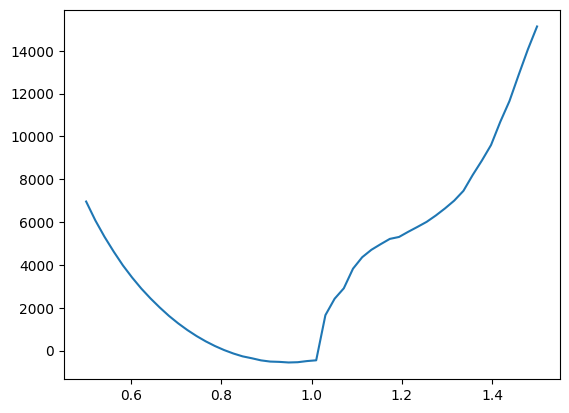

In [20]:
plt.plot(T_test, -L)

In [21]:
zip()

-559.2961162761569